### For simulating qubit design, gate-qubit coupling, resonator-qubit coupling
        ---Zhenhai, 20230526

In [1]:
import numpy as np
import scipy
from scipy.constants import e, hbar
import matplotlib.pyplot as plt

### define the units 

In [2]:
fF = 1e-15
aF = 1e-18
GHz = 1e9
MHz = 1e6
us = 1e-6

### the capacitance matrix got from simulation

In [3]:
C_qubit = 95*fF # the qubit capacitance 
C_qubitDrive_coupling = 0.2*fF # the coupling capacitance between qubit and the drive line (gate/charge line)
Z_ext = 35 # the impedance seen by the qubit

In [4]:
qubit_freq_list = np.linspace(3.5*GHz, 8*GHz, 151)


#### relaxation(Q factor) due to coupling to continuous EM environment

In [5]:
Q_EM = C_qubit / (2*np.pi*qubit_freq_list) / C_qubitDrive_coupling**2 / Z_ext

#### relaxation(Q factor) due to the intrinsic loss

In [6]:
Q_int = 0.25 * 1e6 # estimate from the bare resonator measurement
Q_int_future = 0.75*1e6

#### relaxation(Q factor) due to the Purcell effect

In [7]:
Q_res_load = 10000 # loaded quality factor of the readout resonator
g_res_qubit = 2*np.pi * 50*MHz # the couping strength between resonator and qubit
wr = 2 * np.pi * 6.418*GHz # the resonator frequency
gama = wr / Q_res_load
Q_Pur = 2*np.pi*qubit_freq_list * (2*np.pi*qubit_freq_list - wr)**2 / g_res_qubit**2 / gama
Q_Pur_high_order = 2*np.pi*qubit_freq_list * (2*np.pi*qubit_freq_list - 2*wr)**2 / np.sqrt(2) / g_res_qubit**2 / gama

#### Q loaded factor of the qubit

In [8]:
Q_loaded = 1.0 / (1/Q_EM + 1/Q_int + 1/Q_Pur + 1/Q_Pur_high_order)
Q_loaded_future = 1.0 / (1/Q_EM + 1/Q_int_future + 1/Q_Pur + 1/Q_Pur_high_order)
T1 = Q_loaded / (2*np.pi*qubit_freq_list) /us
T1_future = Q_loaded_future / (2*np.pi*qubit_freq_list) /us

### plotting

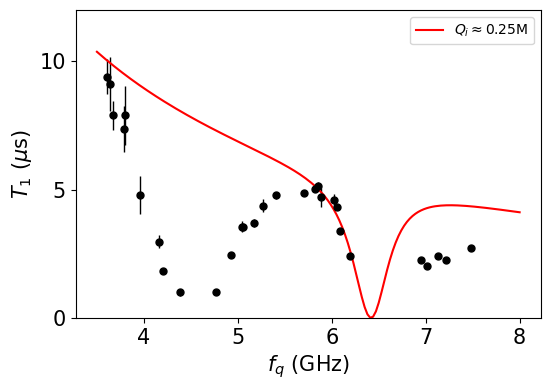

In [9]:
# qubitFreq = np.array([5.2882, 5.1775, 4.7048, 4.4161, 3.9236, 3.7503, 3.4369])
# T1_array = np.array([2.39, 1.99, 2.69, 2.72, 4.57, 4.09, 5.84])
# T1_uncer_array = np.array([0.1, 0.12, 0.12, 0.14, 0.59, 0.25, 0.4])
qubitFreq = np.array([3.511, 5.7499, 5.7849, 5.6053, 4.9435, 5.163, 4.9501, 4.66698, 4.1, 4.282, 3.7, 3.6935, 3.5407, 3.5698, 7.385, 7.117, 7.031, 6.9147, 6.845, 5.919, 6.093, 5.9845, 5.9538, 5.726, 5.0761, 5.3041, 4.823, 3.854, 4.0608]) +0.1
T1_array = np.array([9.4, 5.14, 4.7, 4.86, 3.55, 4.37, 3.56, 1.02, 1.81, 1.0, 7.9, 7.36, 9.1, 7.89, 2.74, 2.27, 2.40, 2.04, 2.26, 4.59, 2.4, 3.37, 4.33, 5.04, 3.7, 4.77, 2.47, 4.78, 2.97])
T1_uncer_array = np.array([0.68, 0.16, 0.38, 0.08, 0.22, 0.25, 0.08, 0.07, 0.03, 0.13, 1.15, 0.91, 1.05, 0.57, 0.06, 0.06, 0.07, 0.05, 0.03, 0.25, 0.11, 0.1, 0.05, 0.11, 0.14, 0.12, 0.06, 0.75, 0.26])
plt.figure(figsize=(6, 4))
plt.errorbar(x=qubitFreq, y=T1_array, yerr=T1_uncer_array, linestyle='', marker='o', ecolor='k', color='k', ms=5, linewidth = 1, elinewidth=1)
plt.plot(qubit_freq_list/1e9, T1, 'r-', label=r"$Q_{i} \approx 0.25$M")
# plt.plot(qubit_freq_list/1e9, T1_future, 'C0--', label=r"$Q_{i} \approx 0.75$M")
plt.xlabel("$f_{q}$ (GHz)", fontsize=15)
plt.ylabel("$T_{1}$ ($\mu$s)", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([0, 5, 10], fontsize=15)
plt.ylim([0, 12])
plt.legend()
plt.savefig("gatemon_rightnow_T1.pdf", dpi=300, bbox_inches="tight", transparent = True)
plt.show()
